In [34]:
from selenium import webdriver
PATH = 'C:\Program Files (x86)\edgedriver_win32\msedgedriver.exe'
browser = webdriver.Edge(executable_path = PATH)
url = 'https://www.amazon.de/s?i=digital-text&bbn=567112031&rh=n%3A530484031%2Cn%3A530886031%2Cn%3A567112031%2Cn%3A610669031%2Cp_n_feature_nineteen_browse-bin%3A4787284031&s=review-rank&dc&fs=true&qid=1617487879&rnid=567112031&ref=sr_nr_n_3'
browser.get(url)

In [35]:
import pandas as pd
import numpy as np

titles_list = []
authors_list = []
rating_list = []
review_list = []
price_list = []

def scrape_data():
    titles = browser.find_elements_by_class_name('a-size-medium.a-color-base.a-text-normal')
    authors_div = browser.find_elements_by_class_name('a-section.a-spacing-medium')
    rating_div = browser.find_elements_by_class_name('a-row.a-size-small')
    price_div = browser.find_elements_by_class_name('a-section.a-spacing-none.a-spacing-top-mini')
    for i in range(0,len(titles)):
        titles_list.append(titles[i].text)
        try:
            author = authors_div[i].find_element_by_xpath('.//div[2]/div[2]/div/div[1]/div/div').text.split('|')[0][3:]
        except Exception:
            author = np.NaN
        try:
            rating = rating_div[i].find_element_by_xpath('.//span[1]').get_attribute('aria-label').split(' ')[0].replace(',','.')
        except Exception:
            rating = np.NaN
        try:
            review = rating_div[i].find_element_by_xpath('.//span[2]').get_attribute('aria-label').replace('.',',')
        except Exception:
            review = np.NaN
        try:
            price = price_div[i].find_element_by_xpath('.//div/span').text.split(' ')[2].replace(',','.')
        except Exception:
            price = np.NaN
        authors_list.append(author)
        rating_list.append(rating)
        review_list.append(review)
        price_list.append(price) 

scrape_data()
total_pages_number = int(browser.find_element_by_xpath('//*[@id="search"]/div[1]/div/div[1]/div/span[3]/div[2]/div[17]/span/div/div/ul/li[6]').text)
for page in range(0,(total_pages_number-1)):
    parent = browser.find_element_by_class_name('a-last')
    next_page_url = parent.find_element_by_xpath('.//a').get_attribute('href')
    browser.get(next_page_url)
    scrape_data()
    
print(total_pages_number)

46


In [36]:
data = {'titles': titles_list, 'authors': authors_list, 'rating': rating_list, 'review': review_list, 'price': price_list}
df = pd.DataFrame(data)
df.to_csv('D:\MSc\Python\Samples\ebooksData3.csv')
print(len(df))
df.head(5)

722


,titles,authors,rating,review,price
0,"Bob, der Streuner: Die Katze, die mein Leben v...",James Bowen,4.7,"2,128",8.99
1,Als hätte der Himmel mich vergessen: Verwahrlo...,Amelie Sander und Beate Rygiert,4.7,827,8.99
2,Die Toten Hosen: Am Anfang war der Lärm,Philipp Oehmke,4.7,259,9.99
3,Generalisierte Angststörung: 8 erste Schritte ...,Anna I. Marks,5.0,20,4.99
4,Die Sonne in deinen Zeilen,Nancy Salchow,5.0,19,2.99


In [37]:
df.describe()

,titles,authors,rating,review,price
count,722,705,432,432,704
unique,721,565,33,85,247
top,"Studienplaner 2019/2020: Studienplaner, Wochen...",Deni Iseli,5.0,1,2.99
freq,2,59,127,78,81


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   titles   722 non-null    object
 1   authors  705 non-null    object
 2   rating   432 non-null    object
 3   review   432 non-null    object
 4   price    704 non-null    object
dtypes: object(5)
memory usage: 28.3+ KB


In [144]:
df['rating'] = df['rating'].astype(float)
df['review'] = pd.to_numeric(df['review'] , errors='coerce')
df['price'] = pd.to_numeric(df['price'] , errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   titles   722 non-null    object 
 1   authors  705 non-null    object 
 2   rating   432 non-null    float64
 3   review   431 non-null    float64
 4   price    702 non-null    float64
dtypes: float64(3), object(2)
memory usage: 28.3+ KB


In [145]:
df['authors'].fillna('No Author', inplace=True)
df['rating'].fillna(0, inplace=True)
df['review'].fillna(0, inplace=True)
df['price'].fillna(0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   titles   722 non-null    object 
 1   authors  722 non-null    object 
 2   rating   722 non-null    float64
 3   review   722 non-null    float64
 4   price    722 non-null    float64
dtypes: float64(3), object(2)
memory usage: 28.3+ KB


In [148]:
df.describe()

,rating,review,price
count,722.000000,722.000000,722.000000
mean,2.514127,14.184211,5.368961
std,2.169789,49.188879,3.518554
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.990000
50%,3.500000,1.000000,4.680000
75%,4.500000,7.000000,6.997500
max,5.000000,826.000000,27.630000


In [150]:
df.corr()

,rating,review,price
rating,1.000000,0.243513,0.077885
review,0.243513,1.000000,0.143428
price,0.077885,0.143428,1.000000


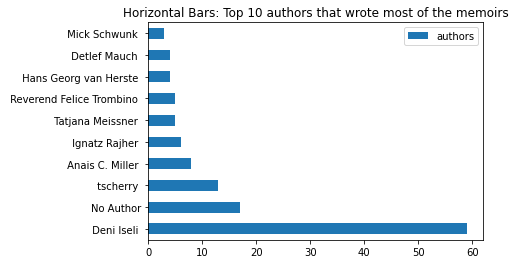

In [155]:
data = df['authors'].value_counts()[:10]
data.plot(title='Horizontal Bars: Top 10 authors that wrote most of the memoirs', kind='barh', legend=True)

In [153]:
pivot = df.pivot_table(index=['authors'], values=['rating', 'review'], aggfunc='mean').reset_index()
newdf = pivot[(pivot.rating>=4.5) & (pivot.review>=200)]
newdf[:10]

,authors,rating,review
15,Amelie Sander und Beate Rygiert,4.7,826.0
92,Corinne Hofmann,4.5,366.0
120,Dominik Bloh und Axel Martens,4.6,490.0
393,"Michelle Burford , Michelle Knight , et al.",4.6,209.0
438,Philipp Oehmke,4.7,259.0
477,Sabine Kuegler,4.6,286.0
494,Sophie Seeberg,4.6,223.0


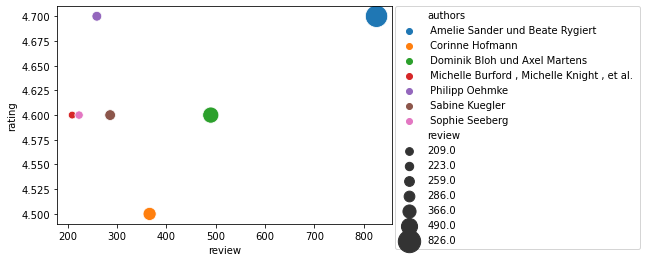

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=newdf, x='review', y='rating', size='review', hue='authors', legend='full', sizes=(60, 500))
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)